# tanic 人群年龄与票价的关系
#### 人群年龄大于22
#### 票价高于130低于400
#### 三种方法

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
path = 'G:/AI_FOR_NLP/AI-For-NLP-Course/lesson_03/titanic/train.csv'

In [3]:
content = pd.read_csv(path)

In [4]:
content = content.dropna()#这个方法的目的

In [5]:
content

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C


In [6]:
# 票价
fares = content['Fare'].tolist()

In [7]:
#年龄
ages = content['Age'].tolist()

In [8]:
%matplotlib inline 

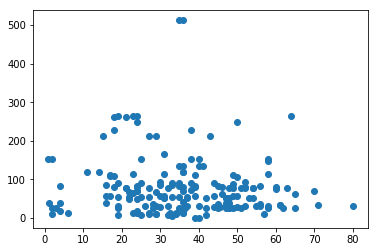

In [9]:
plt.scatter(ages,fares)

In [10]:
#取年龄大于22岁，票价大于130小于400的数据
age_with_fares = content[
    (content['Age'] > 22) & (content['Fare'] < 400) & (content['Fare'] > 130)
]

In [11]:
sub_fare = age_with_fares['Fare']
sub_age = age_with_fares['Age']

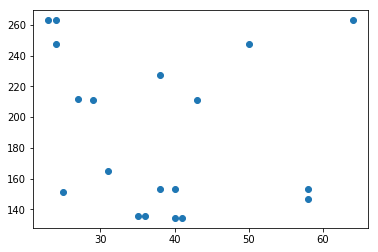

In [12]:
plt.scatter(sub_age,sub_fare)

In [132]:
def func(age,k,b):return k*age + b #拟合函数

def step():return random.random()*1#步长

def derivate_k(y, yhat, x):
    abs_values = [1 if (y_i - yhat_i) > 0 else -1 for y_i, yhat_i in zip(y, yhat)]
    return np.mean([a * -x_i for a, x_i in zip(abs_values, x)])

def derivate_b(y, yhat):
    abs_values = [1 if (y_i - yhat_i) > 0 else -1 for y_i, yhat_i in zip(y, yhat)]
    return np.mean([a * -1 for a in abs_values])


def loss(y,yhat):
    """
    y:real value
    yhat:pred value
    return how good is the estimated fares
    rule average of sum(abs(y-yhat))
    """
    return np.mean(np.abs(y-yhat))
def init_parameters():
    ''' init k and b'''
    k_hat = random.randint(-10,10)
    b_hat = random.randint(-10,10)
    return k_hat,b_hat

In [23]:
k_hat,b_hat = init_parameters()

In [24]:
#test:
estimated_fares = func(sub_age,k_hat,b_hat)
performace = loss(y= sub_fare,yhat=estimated_fares)

In [25]:
performace

106.28333684210527

### 方法一：Random Choose Method to get optimal k* and *b

In [53]:
def random_parameters(age,fare):
    ''' Random Choose Method to get optimal k* and *b '''
    k_hat,b_hat = init_parameters()
    min_error_rate = float('inf')
    best_k,best_b = None,None
    loop_times = 10000
    losses=[]
    while loop_times>0:
        pred = func(age,k_hat,b_hat)
        error_rate = loss(fare,pred)
        if error_rate < min_error_rate:
            min_error_rate = error_rate
            best_k,best_b = k_hat,b_hat
            losses.append(min_error_rate)
            print('loop=={}'.format(10000-loop_times))
            print('f(age)={}*age+{},with error rate:{}'.format(best_k,best_b,min_error_rate))
        k_hat,b_hat = init_parameters()
        loop_times -= 1
    #plt.scatter(age,fare)
    #plt.plot(age,func(age,best_k,best_b),c='r')
    plt.plot(range(len(losses)),losses)
    plt.show()
            

loop==0
f(age)=-7*age+1,with error rate:455.701747368421
loop==1
f(age)=-3*age+8,with error rate:296.28069473684207
loop==2
f(age)=3*age+0,with error rate:80.70350526315791
loop==8
f(age)=3*age+7,with error rate:75.17718947368422
loop==31
f(age)=4*age+-7,with error rate:64.79473684210528
loop==76
f(age)=4*age+10,with error rate:61.20965263157896


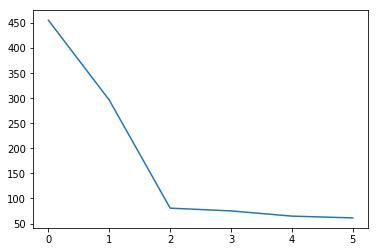

In [54]:
random_parameters(sub_age,sub_fare)

### 方法二：Supervised Direction to get optimal k* and *b

In [96]:
def direction_fun(age,fare):
    ''' Supervised Direction to get optimal k* and *b '''
    k_hat,b_hat = init_parameters()
    min_error_rate = float('inf')
    best_k,best_b = k_hat,b_hat
    loop_times = 10000
    losses=[]
    change_dirction = [(+1,-1),(+1,+1),(-1,-1),(-1,+1)]
    direction = random.choice(change_dirction)
    while loop_times > 0:
        # random direction
        k_delta_direction,b_delta_direction = direction
        # add step for dirction
        k_delta = k_delta_direction * step()
        b_delta = b_delta_direction * step()
        # modify k,b by k_delta, b_delta
        new_k, new_b = best_k + k_delta, best_b + b_delta
        pred = func(age,new_k,new_b)
        error_rate = loss(fare,pred)
        if error_rate < min_error_rate:#有监督学习的表现
            direction =  (k_delta_direction,b_delta_direction)#记录这次的方向
            min_error_rate = error_rate
            best_k,best_b = new_k,new_b
            losses.append(min_error_rate)
            print('loop=={}'.format(10000-loop_times))
            print('f(age)={}*age+{},with error rate:{}'.format(best_k,best_b,min_error_rate))
        else:
            #direction = random.choice(change_dirction) 
            #选的新方向不能等于老方向
            direction = random.choice(list(set(change_dirction)-{(k_delta_direction,b_delta_direction)}))
        loop_times -= 1
    #plt.scatter(age,fare)
    #plt.plot(age,func(age,best_k,best_b),c='r')
    plt.plot(range(len(losses)),losses)
    plt.show()
    

loop==0
f(age)=-2.590215875686555*age+3.9122017644092937,with error rate:284.7535610775415
loop==2
f(age)=-2.055386309168772*age+3.729190565901887,with error rate:264.5567508992661
loop==3
f(age)=-1.6022824970914322*age+3.05538030887168,with error rate:247.96492115924397
loop==4
f(age)=-1.0000410453505122*age+2.538781480274153,with error rate:225.53295098466117
loop==5
f(age)=-0.9816464887916702*age+2.2467584153718883,with error rate:225.12404463121592
loop==6
f(age)=-0.7097195448387797*age+1.43988548077406,with error rate:215.5690698067668
loop==7
f(age)=0.23321141631414832*age+1.3247598190172662,with error rate:179.7535630540647
loop==8
f(age)=0.5226841441903911*age+0.7438048794714497,with error rate:169.3040835208526
loop==9
f(age)=0.5493217765168197*age+0.36855128361837586,with error rate:168.66430312700388
loop==10
f(age)=0.722725401734017*age+0.10046922963397775,with error rate:162.324794409554
loop==11
f(age)=1.1601329166437446*age+-0.6204237974312804,with error rate:146.3781589

loop==3035
f(age)=3.452224783277821*age+39.32044599212559,with error rate:57.18688783993333
loop==3040
f(age)=3.483348001869041*age+39.9569259067756,with error rate:57.033972958940204
loop==3084
f(age)=3.440177329396935*age+40.63443533693297,with error rate:56.999706286763114
loop==3088
f(age)=3.3914750619392686*age+41.30320024622805,with error rate:56.976136698908384
loop==3099
f(age)=3.489868636123089*age+42.288067335235986,with error rate:56.93277482803057
loop==3102
f(age)=3.3124783453463924*age+42.772720540328,with error rate:56.87715428041745
loop==3109
f(age)=3.2882888796444716*age+43.75230022517924,with error rate:56.76322395662311
loop==3118
f(age)=3.429645129808887*age+43.22404763577378,with error rate:56.608558575726015
loop==3236
f(age)=3.3770221500854842*age+43.837152305890825,with error rate:56.600380751557466
loop==3255
f(age)=3.4225601596780395*age+43.36959599483342,with error rate:56.597509837147506
loop==3279
f(age)=3.4110875829641936*age+43.86607659875798,with error 

loop==6575
f(age)=2.665608957300263*age+82.56383679010297,with error rate:51.718654312047626
loop==6601
f(age)=2.6134015087973124*age+83.38777985167224,with error rate:51.64164274544576
loop==6613
f(age)=2.5848582283459036*age+84.3633476862677,with error rate:51.535678612322535
loop==6645
f(age)=2.5315492677777924*age+85.03562277665974,with error rate:51.51931342637534
loop==6650
f(age)=2.542155082496153*age+85.5247629674812,with error rate:51.42421833987786
loop==6696
f(age)=2.517090619200202*age+85.82118010941085,with error rate:51.41962946617689
loop==6730
f(age)=2.498294662493268*age+86.31818887553,with error rate:51.37281074598028
loop==6738
f(age)=2.502550504013289*age+86.56612235196826,with error rate:51.32649562187738
loop==6771
f(age)=2.4642948007230734*age+87.31051030627813,with error rate:51.27339133989618
loop==6805
f(age)=2.5451384558277845*age+87.76506543277851,with error rate:51.25468885484501
loop==6833
f(age)=2.500499713877142*age+87.22280210725475,with error rate:51.2

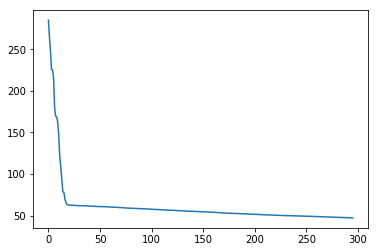

In [97]:
direction_fun(sub_age,sub_fare)

### 方法三： Gradient Descent to get optimal k* and *b 

In [137]:
def gradient_fun(age,fare):
    ''' Gradient Descent to get optimal k* and *b '''
    k_hat,b_hat = init_parameters()
    best_k,best_b = k_hat,b_hat
    loop_times = 10000
    losses=[]
    learning_rate = 1e-1
    while loop_times > 0:
        # 根据定义的导函数，求导，并添加学习率(mark还有其他方法，如调步长)
        k_delta = -1 * learning_rate * derivate_k(fare,func(age,k_hat,b_hat),age)
        b_delta = -1 * learning_rate * derivate_b(fare,func(age,k_hat,b_hat))
       
        # 用求得的delta调整k，b
        k_hat += k_delta
        b_hat += b_delta
        print(b_delta)
        # 预测
        pred = func(age,k_hat,b_hat)
        # 计算loss
        error_rate = loss(fare,pred)
        #losses.append(error_rate)
        print('loop=={}'.format(10000-loop_times))
        print('f(age)={}*age+ {},with error rate:{}'.format(k_hat,b_hat,error_rate))

        loop_times -= 1
    plt.scatter(age,fare)
    plt.plot(age,func(age,k_hat,b_hat),c='r')
    #plt.plot(range(len(losses)),losses)
    plt.show()
    

0.07894736842105264
loop==0
f(age)=5.589473684210526*age+ -6.921052631578948,with error rate:75.24774127423822
-0.02631578947368421
loop==1
f(age)=3.7789473684210524*age+ -6.947368421052632,with error rate:68.45973795013852
0.05789473684210527
loop==2
f(age)=5.51578947368421*age+ -6.889473684210526,with error rate:74.00268476454293
-0.015789473684210527
loop==3
f(age)=4.03157894736842*age+ -6.905263157894737,with error rate:64.41530470914128
0.03684210526315789
loop==4
f(age)=4.9684210526315775*age+ -6.868421052631579,with error rate:66.99053905817173
0.005263157894736842
loop==5
f(age)=4.463157894736841*age+ -6.863157894736842,with error rate:64.43735346260387
0.005263157894736842
loop==6
f(age)=3.9578947368421042*age+ -6.8578947368421055,with error rate:65.2999041551247
0.05789473684210527
loop==7
f(age)=5.694736842105263*age+ -6.8,with error rate:77.18541440443212
-0.02631578947368421
loop==8
f(age)=3.8842105263157887*age+ -6.826315789473684,with error rate:66.5614
0.057894736842105

loop==230
f(age)=3.884210526315768*age+ -3.0473684210526173,with error rate:64.49473684210554
0.04736842105263158
loop==231
f(age)=5.242105263157873*age+ -2.999999999999986,with error rate:70.55476232686947
-0.015789473684210527
loop==232
f(age)=3.757894736842083*age+ -3.015789473684196,with error rate:66.54921163434942
0.05789473684210527
loop==233
f(age)=5.494736842105241*age+ -2.957894736842091,with error rate:74.57544210526275
-0.02631578947368421
loop==234
f(age)=3.684210526315767*age+ -2.984210526315775,with error rate:67.81070747922475
0.05789473684210527
loop==235
f(age)=5.421052631578926*age+ -2.9263157894736698,with error rate:73.24968033240958
-0.02631578947368421
loop==236
f(age)=3.6105263157894516*age+ -2.952631578947354,with error rate:69.07220332410009
0.05789473684210527
loop==237
f(age)=5.347368421052609*age+ -2.8947368421052486,with error rate:72.13370969529052
-0.015789473684210527
loop==238
f(age)=3.8631578947368195*age+ -2.910526315789459,with error rate:64.7157894

-0.02631578947368421
loop==447
f(age)=3.5999999999999552*age+ 0.6631578947368546,with error rate:67.161677008311
0.05789473684210527
loop==448
f(age)=5.336842105263113*age+ 0.7210526315789598,with error rate:72.68486038781083
-0.02631578947368421
loop==449
f(age)=3.5263157894736388*age+ 0.6947368421052756,with error rate:68.42317285318639
0.05789473684210527
loop==450
f(age)=5.263157894736796*age+ 0.7526315789473809,with error rate:71.45974847645361
-0.015789473684210527
loop==451
f(age)=3.7789473684210066*age+ 0.7368421052631703,with error rate:64.13157894736905
0.04736842105263158
loop==452
f(age)=5.136842105263112*age+ 0.7842105263158019,with error rate:69.58994238227079
-0.015789473684210527
loop==453
f(age)=3.652631578947322*age+ 0.7684210526315913,with error rate:66.18660775623349
0.05789473684210527
loop==454
f(age)=5.38947368421048*age+ 0.8263157894736965,with error rate:73.66546980609337
-0.02631578947368421
loop==455
f(age)=3.578947368421006*age+ 0.8000000000000124,with error

-0.015789473684210527
loop==659
f(age)=3.6526315789472954*age+ 4.294736842105282,with error rate:64.16149584487634
0.04736842105263158
loop==660
f(age)=5.0105263157894*age+ 4.342105263157913,with error rate:68.27692299168865
-0.015789473684210527
loop==661
f(age)=3.526315789473611*age+ 4.3263157894737025,with error rate:66.32067977839462
0.05789473684210527
loop==662
f(age)=5.263157894736769*age+ 4.384210526315808,with error rate:72.31477728531722
-0.02631578947368421
loop==663
f(age)=3.4526315789472948*age+ 4.357894736842124,with error rate:67.58217562326996
0.05789473684210527
loop==664
f(age)=5.189473684210453*age+ 4.41578947368423,with error rate:70.98901551246405
-0.02631578947368421
loop==665
f(age)=3.378947368420979*age+ 4.389473684210546,with error rate:68.84367146814532
0.05789473684210527
loop==666
f(age)=5.115789473684137*age+ 4.447368421052651,with error rate:69.8558703601097
-0.015789473684210527
loop==667
f(age)=3.631578947368347*age+ 4.431578947368441,with error rate:64.

0.04736842105263158
loop==868
f(age)=4.936842105263057*age+ 7.900000000000049,with error rate:67.74506703600959
-0.015789473684210527
loop==869
f(age)=3.4526315789472677*age+ 7.884210526315838,with error rate:65.54062437673304
0.05789473684210527
loop==870
f(age)=5.189473684210426*age+ 7.942105263157944,with error rate:71.91699335179874
-0.02631578947368421
loop==871
f(age)=3.3789473684209517*age+ 7.91578947368426,with error rate:66.80212022160838
0.05789473684210527
loop==872
f(age)=5.11578947368411*age+ 7.973684210526366,with error rate:70.59123157894555
-0.02631578947368421
loop==873
f(age)=3.305263157894636*age+ 7.947368421052682,with error rate:68.06361606648372
0.05789473684210527
loop==874
f(age)=5.042105263157794*age+ 8.005263157894786,with error rate:69.32401440443066
-0.015789473684210527
loop==875
f(age)=3.557894736842004*age+ 7.989473684210576,with error rate:63.69778393351936
0.04736842105263158
loop==876
f(age)=4.915789473684109*age+ 8.036842105263208,with error rate:67.4

loop==1073
f(age)=3.2315789473682877*age+ 11.347368421052597,with error rate:67.37497340720456
0.05789473684210527
loop==1074
f(age)=4.968421052631445*age+ 11.405263157894701,with error rate:68.82613462603635
-0.02631578947368421
loop==1075
f(age)=3.157894736841971*age+ 11.378947368421017,with error rate:68.63646925207992
0.05789473684210527
loop==1076
f(age)=4.894736842105129*age+ 11.436842105263121,with error rate:67.67858504154924
-0.015789473684210527
loop==1077
f(age)=3.410526315789339*age+ 11.421052631578911,with error rate:64.22428088642896
0.05789473684210527
loop==1078
f(age)=5.147368421052497*age+ 11.478947368421016,with error rate:72.0854144044297
-0.02631578947368421
loop==1079
f(age)=3.336842105263023*age+ 11.452631578947331,with error rate:65.4857767313043
0.05789473684210527
loop==1080
f(age)=5.0736842105261815*age+ 11.510526315789436,with error rate:70.7596526315765
-0.02631578947368421
loop==1081
f(age)=3.2631578947367075*age+ 11.484210526315751,with error rate:66.7472

loop==1276
f(age)=5.031578947368252*age+ 14.83684210526303,with error rate:70.87267202215757
-0.02631578947368421
loop==1277
f(age)=3.221052631578778*age+ 14.810526315789344,with error rate:65.5528127423853
0.05789473684210527
loop==1278
f(age)=4.957894736841936*age+ 14.868421052631449,with error rate:69.54691024930439
-0.02631578947368421
loop==1279
f(age)=3.1473684210524624*age+ 14.842105263157764,with error rate:66.81430858726064
0.05789473684210527
loop==1280
f(age)=4.88421052631562*age+ 14.899999999999869,with error rate:68.2211484764512
-0.02631578947368421
loop==1281
f(age)=3.073684210526146*age+ 14.873684210526184,with error rate:68.075804432136
0.05789473684210527
loop==1282
f(age)=4.8105263157893035*age+ 14.931578947368289,with error rate:66.98052409972044
-0.015789473684210527
loop==1283
f(age)=3.326315789473514*age+ 14.915789473684079,with error rate:63.66361606648504
0.05789473684210527
loop==1284
f(age)=5.063157894736672*age+ 14.973684210526184,with error rate:71.48042825

loop==1488
f(age)=4.726315789473478*age+ 18.42631578947343,with error rate:66.29040055401282
-0.02631578947368421
loop==1489
f(age)=2.915789473684004*age+ 18.399999999999746,with error rate:68.77663545706744
0.05789473684210527
loop==1490
f(age)=4.652631578947162*age+ 18.45789473684185,with error rate:65.19382049861187
-0.015789473684210527
loop==1491
f(age)=3.168421052631372*age+ 18.44210526315764,with error rate:64.36444709141647
0.05789473684210527
loop==1492
f(age)=4.90526315789453*age+ 18.499999999999744,with error rate:69.54968033240617
-0.02631578947368421
loop==1493
f(age)=3.094736842105056*age+ 18.47368421052606,with error rate:65.62594293629184
0.05789473684210527
loop==1494
f(age)=4.8315789473682145*age+ 18.531578947368164,with error rate:68.22391855955298
-0.02631578947368421
loop==1495
f(age)=3.0210526315787405*age+ 18.50526315789448,with error rate:66.88743878116719
0.05789473684210527
loop==1496
f(age)=4.757894736841898*age+ 18.563157894736584,with error rate:66.89815678

loop==1700
f(age)=4.747368421052389*age+ 22.02631578947329,with error rate:67.61893240996781
-0.02631578947368421
loop==1701
f(age)=2.9368421052629152*age+ 21.999999999999606,with error rate:66.3267739612233
0.05789473684210527
loop==1702
f(age)=4.673684210526073*age+ 22.05789473684171,with error rate:66.2931706371146
-0.02631578947368421
loop==1703
f(age)=2.8631578947365988*age+ 22.031578947368025,with error rate:67.58826980609864
0.05789473684210527
loop==1704
f(age)=4.599999999999756*age+ 22.08947368421013,with error rate:64.98606426592431
-0.015789473684210527
loop==1705
f(age)=3.1157894736839666*age+ 22.07368421052592,with error rate:63.17608144044768
0.05789473684210527
loop==1706
f(age)=4.852631578947125*age+ 22.131578947368023,with error rate:69.55245041550795
-0.02631578947368421
loop==1707
f(age)=3.0421052631576506*age+ 22.10526315789434,with error rate:64.43757728532303
0.05789473684210527
loop==1708
f(age)=4.778947368420809*age+ 22.163157894736443,with error rate:68.2266886

loop==1897
f(age)=3.5999999999997487*age+ 25.115789473683854,with error rate:59.180843767313505
0.015789473684210527
loop==1898
f(age)=3.7684210526313278*age+ 25.131578947368066,with error rate:59.24317063711786
0.005263157894736842
loop==1899
f(age)=3.263157894736591*age+ 25.136842105262804,with error rate:60.200165096954436
0.02631578947368421
loop==1900
f(age)=3.83157894736817*age+ 25.16315789473649,with error rate:59.56062216066357
0.005263157894736842
loop==1901
f(age)=3.3263157894734334*age+ 25.168421052631228,with error rate:59.83285207756385
0.02631578947368421
loop==1902
f(age)=3.8947368421050124*age+ 25.194736842104913,with error rate:59.87807368420929
0.005263157894736842
loop==1903
f(age)=3.3894736842102757*age+ 25.19999999999965,with error rate:59.52211800554065
0.015789473684210527
loop==1904
f(age)=3.5578947368418548*age+ 25.215789473683863,with error rate:59.2359684210531
0.015789473684210527
loop==1905
f(age)=3.726315789473434*age+ 25.231578947368074,with error rate:59

0.015789473684210527
loop==2118
f(age)=3.494736842105023*age+ 28.16315789473676,with error rate:58.87696565096994
0.015789473684210527
loop==2119
f(age)=3.663157894736602*age+ 28.17894736842097,with error rate:58.59081606648241
0.015789473684210527
loop==2120
f(age)=3.831578947368181*age+ 28.194736842105183,with error rate:59.40106537396
0.005263157894736842
loop==2121
f(age)=3.326315789473444*age+ 28.19999999999992,with error rate:59.154804986150005
0.015789473684210527
loop==2122
f(age)=3.494736842105023*age+ 28.215789473684133,with error rate:58.868655401662465
0.015789473684210527
loop==2123
f(age)=3.663157894736602*age+ 28.231578947368345,with error rate:58.58250581717493
0.015789473684210527
loop==2124
f(age)=3.831578947368181*age+ 28.247368421052556,with error rate:59.39829529085752
0.005263157894736842
loop==2125
f(age)=3.326315789473444*age+ 28.252631578947295,with error rate:59.14649473684253
0.015789473684210527
loop==2126
f(age)=3.494736842105023*age+ 28.268421052631506,wit

0.015789473684210527
loop==2342
f(age)=3.621052631578708*age+ 31.121052631579147,with error rate:58.19718725761809
0.015789473684210527
loop==2343
f(age)=3.789473684210287*age+ 31.13684210526336,with error rate:59.03347534625917
0.005263157894736842
loop==2344
f(age)=3.28421052631555*age+ 31.142105263158097,with error rate:58.7611761772857
0.015789473684210527
loop==2345
f(age)=3.452631578947129*age+ 31.15789473684231,with error rate:58.47502659279815
0.015789473684210527
loop==2346
f(age)=3.621052631578708*age+ 31.17368421052652,with error rate:58.18887700831061
0.015789473684210527
loop==2347
f(age)=3.789473684210287*age+ 31.189473684210732,with error rate:59.03070526315668
0.005263157894736842
loop==2348
f(age)=3.28421052631555*age+ 31.19473684210547,with error rate:58.752865927978206
0.015789473684210527
loop==2349
f(age)=3.452631578947129*age+ 31.210526315789682,with error rate:58.46671634349068
0.015789473684210527
loop==2350
f(age)=3.621052631578708*age+ 31.226315789473894,with 

0.015789473684210527
loop==2542
f(age)=3.747368421052393*age+ 33.763157894736935,with error rate:58.68250581717332
0.005263157894736842
loop==2543
f(age)=3.242105263157656*age+ 33.76842105263167,with error rate:58.41740886426632
0.015789473684210527
loop==2544
f(age)=3.410526315789235*age+ 33.78421052631588,with error rate:58.13125927977878
0.015789473684210527
loop==2545
f(age)=3.578947368420814*age+ 33.80000000000009,with error rate:57.84510969529125
0.015789473684210527
loop==2546
f(age)=3.747368421052393*age+ 33.8157894736843,with error rate:58.67973573407081
0.005263157894736842
loop==2547
f(age)=3.242105263157656*age+ 33.821052631579036,with error rate:58.40909861495885
0.015789473684210527
loop==2548
f(age)=3.410526315789235*age+ 33.836842105263244,with error rate:58.122949030471304
0.015789473684210527
loop==2549
f(age)=3.578947368420814*age+ 33.85263157894745,with error rate:57.83679944598377
0.015789473684210527
loop==2550
f(age)=3.747368421052393*age+ 33.86842105263166,with 

loop==2755
f(age)=3.368421052631341*age+ 36.568421052631386,with error rate:57.76256121883699
0.015789473684210527
loop==2756
f(age)=3.53684210526292*age+ 36.584210526315594,with error rate:57.47641163434946
0.015789473684210527
loop==2757
f(age)=3.7052631578944992*age+ 36.5999999999998,with error rate:58.32045595567747
0.005263157894736842
loop==2758
f(age)=3.199999999999762*age+ 36.60526315789454,with error rate:58.04040055401704
0.015789473684210527
loop==2759
f(age)=3.368421052631341*age+ 36.62105263157875,with error rate:57.754250969529515
0.015789473684210527
loop==2760
f(age)=3.53684210526292*age+ 36.63684210526296,with error rate:57.46810138504198
0.015789473684210527
loop==2761
f(age)=3.7052631578944992*age+ 36.652631578947165,with error rate:58.31768587257499
0.005263157894736842
loop==2762
f(age)=3.199999999999762*age+ 36.657894736841904,with error rate:58.03209030470956
0.015789473684210527
loop==2763
f(age)=3.368421052631341*age+ 36.67368421052611,with error rate:57.745940

0.015789473684210527
loop==2961
f(age)=3.431578947368184*age+ 39.28421052631531,with error rate:57.22738116343539
0.015789473684210527
loop==2962
f(age)=3.599999999999763*age+ 39.29999999999952,with error rate:57.646494736840936
0.005263157894736842
loop==2963
f(age)=3.094736842105026*age+ 39.30526315789426,with error rate:57.79137008310296
0.015789473684210527
loop==2964
f(age)=3.263157894736605*age+ 39.32105263157847,with error rate:57.50522049861545
0.015789473684210527
loop==2965
f(age)=3.431578947368184*age+ 39.336842105262676,with error rate:57.219070914127904
0.015789473684210527
loop==2966
f(age)=3.599999999999763*age+ 39.352631578946884,with error rate:57.643724653738445
0.005263157894736842
loop==2967
f(age)=3.094736842105026*age+ 39.35789473684162,with error rate:57.783059833795484
0.015789473684210527
loop==2968
f(age)=3.263157894736605*age+ 39.37368421052583,with error rate:57.49691024930797
0.015789473684210527
loop==2969
f(age)=3.431578947368184*age+ 39.38947368421004,wi

loop==3176
f(age)=3.263157894736605*age+ 42.1105263157887,with error rate:57.06477728531909
0.015789473684210527
loop==3177
f(age)=3.431578947368184*age+ 42.126315789472905,with error rate:56.77862770083154
0.015789473684210527
loop==3178
f(age)=3.599999999999763*age+ 42.14210526315711,with error rate:57.49691024930633
0.005263157894736842
loop==3179
f(age)=3.094736842105026*age+ 42.14736842105185,with error rate:57.34261662049915
0.015789473684210527
loop==3180
f(age)=3.263157894736605*age+ 42.16315789473606,with error rate:57.05646703601159
0.015789473684210527
loop==3181
f(age)=3.431578947368184*age+ 42.17894736842027,with error rate:56.770317451524065
0.015789473684210527
loop==3182
f(age)=3.599999999999763*age+ 42.194736842104476,with error rate:57.49414016620383
0.005263157894736842
loop==3183
f(age)=3.094736842105026*age+ 42.199999999999214,with error rate:57.334306371191644
0.015789473684210527
loop==3184
f(age)=3.263157894736605*age+ 42.21578947368342,with error rate:57.048156

loop==3399
f(age)=3.0947368421050263*age+ 45.042105263156806,with error rate:56.88555290858784
0.015789473684210527
loop==3400
f(age)=3.2631578947366053*age+ 45.057894736841014,with error rate:56.59940332410029
0.015789473684210527
loop==3401
f(age)=3.4315789473681844*age+ 45.07368421052522,with error rate:56.49164709141161
0.005263157894736842
loop==3402
f(age)=2.9263157894734473*age+ 45.07894736841996,with error rate:57.16339224376788
0.015789473684210527
loop==3403
f(age)=3.0947368421050263*age+ 45.09473684210417,with error rate:56.87724265928036
0.015789473684210527
loop==3404
f(age)=3.2631578947366053*age+ 45.11052631578838,with error rate:56.59109307479281
0.015789473684210527
loop==3405
f(age)=3.4315789473681844*age+ 45.126315789472585,with error rate:56.48887700830911
0.005263157894736842
loop==3406
f(age)=2.9263157894734473*age+ 45.13157894736732,with error rate:57.15508199446042
0.015789473684210527
loop==3407
f(age)=3.0947368421050263*age+ 45.14736842105153,with error rate:5

loop==3608
f(age)=3.2631578947366053*age+ 47.79473684210388,with error rate:56.167270360111424
0.015789473684210527
loop==3609
f(age)=3.4315789473681844*age+ 47.81052631578809,with error rate:56.347602770081984
0.005263157894736842
loop==3610
f(age)=2.9263157894734473*age+ 47.81578947368283,with error rate:56.731259279779
0.015789473684210527
loop==3611
f(age)=3.0947368421050263*age+ 47.831578947367035,with error rate:56.44510969529148
0.015789473684210527
loop==3612
f(age)=3.2631578947366053*age+ 47.84736842105124,with error rate:56.15896011080393
0.015789473684210527
loop==3613
f(age)=3.4315789473681844*age+ 47.86315789473545,with error rate:56.34483268697949
0.005263157894736842
loop==3614
f(age)=2.9263157894734473*age+ 47.86842105263019,with error rate:56.72294903047154
0.015789473684210527
loop==3615
f(age)=3.0947368421050263*age+ 47.8842105263144,with error rate:56.436799445984
0.015789473684210527
loop==3616
f(age)=3.2631578947366053*age+ 47.899999999998606,with error rate:56.15

loop==3811
f(age)=3.0947368421050263*age+ 50.463157894735176,with error rate:56.029597229917556
0.015789473684210527
loop==3812
f(age)=3.2631578947366053*age+ 50.478947368419384,with error rate:55.74344764543004
0.015789473684210527
loop==3813
f(age)=3.4315789473681844*age+ 50.49473684210359,with error rate:56.206328531854844
0.005263157894736842
loop==3814
f(age)=2.9263157894734473*age+ 50.49999999999833,with error rate:56.30743656509762
0.015789473684210527
loop==3815
f(age)=3.0947368421050263*age+ 50.51578947368254,with error rate:56.02128698061008
0.015789473684210527
loop==3816
f(age)=3.2631578947366053*age+ 50.53157894736675,with error rate:55.735137396122546
0.015789473684210527
loop==3817
f(age)=3.4315789473681844*age+ 50.547368421050955,with error rate:56.20355844875235
0.005263157894736842
loop==3818
f(age)=2.9263157894734473*age+ 50.55263157894569,with error rate:56.29912631579014
0.015789473684210527
loop==3819
f(age)=3.0947368421050263*age+ 50.5684210526299,with error rate

loop==4028
f(age)=3.2631578947366053*age+ 53.321052631576976,with error rate:55.2946941828262
0.015789473684210527
loop==4029
f(age)=3.4315789473681844*age+ 53.336842105261184,with error rate:56.05674404432025
0.005263157894736842
loop==4030
f(age)=2.9263157894734473*age+ 53.34210526315592,with error rate:55.858683102493785
0.015789473684210527
loop==4031
f(age)=3.0947368421050263*age+ 53.35789473684013,with error rate:55.572533518006246
0.015789473684210527
loop==4032
f(age)=3.2631578947366053*age+ 53.37368421052434,with error rate:55.286383933518714
0.015789473684210527
loop==4033
f(age)=3.4315789473681844*age+ 53.389473684208546,with error rate:56.05397396121774
0.005263157894736842
loop==4034
f(age)=2.9263157894734473*age+ 53.394736842103285,with error rate:55.850372853186315
0.015789473684210527
loop==4035
f(age)=3.0947368421050263*age+ 53.41052631578749,with error rate:55.56422326869877
0.015789473684210527
loop==4036
f(age)=3.2631578947366053*age+ 53.4263157894717,with error rat

0.015789473684210527
loop==4250
f(age)=2.9263157894734477*age+ 56.23684210526088,with error rate:55.40161939058247
0.015789473684210527
loop==4251
f(age)=3.0947368421050268*age+ 56.252631578945085,with error rate:55.115469806094936
0.015789473684210527
loop==4252
f(age)=3.263157894736606*age+ 56.26842105262929,with error rate:55.05148088642552
0.005263157894736842
loop==4253
f(age)=2.7578947368418687*age+ 56.27368421052403,with error rate:55.67945872576254
0.015789473684210527
loop==4254
f(age)=2.9263157894734477*age+ 56.28947368420824,with error rate:55.393309141275004
0.015789473684210527
loop==4255
f(age)=3.0947368421050268*age+ 56.30526315789245,with error rate:55.10715955678746
0.015789473684210527
loop==4256
f(age)=3.263157894736606*age+ 56.321052631576656,with error rate:55.04871080332303
0.005263157894736842
loop==4257
f(age)=2.7578947368418687*age+ 56.326315789471394,with error rate:55.67114847645506
0.015789473684210527
loop==4258
f(age)=2.9263157894734477*age+ 56.34210526315

loop==4459
f(age)=3.0947368421050268*age+ 58.98947368420795,with error rate:54.68333684210608
0.015789473684210527
loop==4460
f(age)=3.263157894736606*age+ 59.00526315789216,with error rate:54.9074365650959
0.005263157894736842
loop==4461
f(age)=2.7578947368418687*age+ 59.0105263157869,with error rate:55.24732576177366
0.015789473684210527
loop==4462
f(age)=2.9263157894734477*age+ 59.026315789471106,with error rate:54.96117617728613
0.015789473684210527
loop==4463
f(age)=3.0947368421050268*age+ 59.042105263155314,with error rate:54.67502659279859
0.015789473684210527
loop==4464
f(age)=3.263157894736606*age+ 59.05789473683952,with error rate:54.90466648199341
0.005263157894736842
loop==4465
f(age)=2.7578947368418687*age+ 59.06315789473426,with error rate:55.23901551246618
0.015789473684210527
loop==4466
f(age)=2.9263157894734477*age+ 59.07894736841847,with error rate:54.95286592797865
0.015789473684210527
loop==4467
f(age)=3.0947368421050268*age+ 59.09473684210268,with error rate:54.666

0.005263157894736842
loop==4673
f(age)=2.7578947368418687*age+ 61.79999999999713,with error rate:54.806882548477304
0.015789473684210527
loop==4674
f(age)=2.9263157894734477*age+ 61.815789473681335,with error rate:54.52073296398977
0.015789473684210527
loop==4675
f(age)=3.0947368421050268*age+ 61.83157894736554,with error rate:54.23458337950225
0.015789473684210527
loop==4676
f(age)=3.263157894736606*age+ 61.84736842104975,with error rate:54.757852077561296
0.005263157894736842
loop==4677
f(age)=2.7578947368418687*age+ 61.85263157894449,with error rate:54.79857229916984
0.015789473684210527
loop==4678
f(age)=2.9263157894734477*age+ 61.8684210526287,with error rate:54.512422714682295
0.015789473684210527
loop==4679
f(age)=3.0947368421050268*age+ 61.884210526312906,with error rate:54.22627313019477
0.015789473684210527
loop==4680
f(age)=3.263157894736606*age+ 61.899999999997114,with error rate:54.755081994458784
0.005263157894736842
loop==4681
f(age)=2.7578947368418687*age+ 61.9052631578

loop==4871
f(age)=3.1157894736839755*age+ 64.3999999999968,with error rate:53.87890470914025
0.005263157894736842
loop==4872
f(age)=2.6105263157892384*age+ 64.40526315789153,with error rate:54.64372465374051
0.015789473684210527
loop==4873
f(age)=2.7789473684208175*age+ 64.42105263157573,with error rate:54.35757506925298
0.015789473684210527
loop==4874
f(age)=2.9473684210523965*age+ 64.43684210525994,with error rate:54.071425484765456
0.015789473684210527
loop==4875
f(age)=3.1157894736839755*age+ 64.45263157894415,with error rate:53.87613462603777
0.005263157894736842
loop==4876
f(age)=2.6105263157892384*age+ 64.45789473683888,with error rate:54.63541440443305
0.015789473684210527
loop==4877
f(age)=2.7789473684208175*age+ 64.47368421052309,with error rate:54.3492648199455
0.015789473684210527
loop==4878
f(age)=2.9473684210523965*age+ 64.4894736842073,with error rate:54.063115235457964
0.015789473684210527
loop==4879
f(age)=3.1157894736839755*age+ 64.5052631578915,with error rate:53.873

loop==5086
f(age)=2.9473684210523965*age+ 67.2263157894698,with error rate:53.63098227146916
0.015789473684210527
loop==5087
f(age)=3.1157894736839755*age+ 67.242105263154,with error rate:53.72932022160567
0.005263157894736842
loop==5088
f(age)=2.6105263157892384*age+ 67.24736842104873,with error rate:54.194971191136744
0.015789473684210527
loop==5089
f(age)=2.7789473684208175*age+ 67.26315789473294,with error rate:53.908821606649234
0.015789473684210527
loop==5090
f(age)=2.9473684210523965*age+ 67.27894736841715,with error rate:53.62267202216168
0.015789473684210527
loop==5091
f(age)=3.1157894736839755*age+ 67.29473684210136,with error rate:53.726550138503164
0.005263157894736842
loop==5092
f(age)=2.6105263157892384*age+ 67.29999999999609,with error rate:54.18666094182927
0.015789473684210527
loop==5093
f(age)=2.7789473684208175*age+ 67.3157894736803,with error rate:53.90051135734174
0.015789473684210527
loop==5094
f(age)=2.9473684210523965*age+ 67.3315789473645,with error rate:53.614

loop==5288
f(age)=3.0421052631576644*age+ 69.83684210525874,with error rate:53.22045595567774
0.005263157894736842
loop==5289
f(age)=2.5368421052629273*age+ 69.84210526315347,with error rate:53.90937562326978
0.015789473684210527
loop==5290
f(age)=2.7052631578945063*age+ 69.85789473683768,with error rate:53.62322603878225
0.015789473684210527
loop==5291
f(age)=2.8736842105260854*age+ 69.87368421052189,with error rate:53.337076454294724
0.015789473684210527
loop==5292
f(age)=3.0421052631576644*age+ 69.8894736842061,with error rate:53.21768587257526
0.005263157894736842
loop==5293
f(age)=2.5368421052629273*age+ 69.89473684210083,with error rate:53.90106537396232
0.015789473684210527
loop==5294
f(age)=2.7052631578945063*age+ 69.91052631578503,with error rate:53.61491578947477
0.015789473684210527
loop==5295
f(age)=2.8736842105260854*age+ 69.92631578946924,with error rate:53.32876620498724
0.015789473684210527
loop==5296
f(age)=3.0421052631576644*age+ 69.94210526315345,with error rate:53.2

0.015789473684210527
loop==5496
f(age)=2.578947368420832*age+ 72.45789473683728,with error rate:53.425442105264295
0.015789473684210527
loop==5497
f(age)=2.747368421052411*age+ 72.47368421052148,with error rate:53.139292520776756
0.015789473684210527
loop==5498
f(age)=2.91578947368399*age+ 72.48947368420569,with error rate:52.853142936289224
0.015789473684210527
loop==5499
f(age)=3.084210526315569*age+ 72.5052631578899,with error rate:53.6347645429342
-0.005263157894736842
loop==5500
f(age)=2.252631578947148*age+ 72.49999999999517,with error rate:53.968378393352936
0.015789473684210527
loop==5501
f(age)=2.421052631578727*age+ 72.51578947367938,with error rate:53.6822288088654
0.015789473684210527
loop==5502
f(age)=2.589473684210306*age+ 72.53157894736358,with error rate:53.396079224377864
0.015789473684210527
loop==5503
f(age)=2.757894736841885*age+ 72.54736842104779,with error rate:53.10992963989034
0.015789473684210527
loop==5504
f(age)=2.926315789473464*age+ 72.563157894732,with err

loop==5698
f(age)=2.9684210526313737*age+ 74.92105263157387,with error rate:52.79903047091216
-0.005263157894736842
loop==5699
f(age)=2.1368421052629527*age+ 74.91578947367914,with error rate:53.78195180055517
0.015789473684210527
loop==5700
f(age)=2.3052631578945317*age+ 74.93157894736335,with error rate:53.49580221606763
0.015789473684210527
loop==5701
f(age)=2.4736842105261108*age+ 74.94736842104756,with error rate:53.2096526315801
0.015789473684210527
loop==5702
f(age)=2.64210526315769*age+ 74.96315789473176,with error rate:52.92350304709256
0.015789473684210527
loop==5703
f(age)=2.810526315789269*age+ 74.97894736841597,with error rate:52.63735346260503
0.015789473684210527
loop==5704
f(age)=2.978947368420848*age+ 74.99473684210018,with error rate:52.89044321329443
-0.005263157894736842
loop==5705
f(age)=2.147368421052427*age+ 74.98947368420545,with error rate:53.75258891966874
0.015789473684210527
loop==5706
f(age)=2.315789473684006*age+ 75.00526315788966,with error rate:53.466439

0.015789473684210527
loop==5947
f(age)=2.242105263157707*age+ 77.89473684209987,with error rate:53.13430637119231
0.015789473684210527
loop==5948
f(age)=2.4105263157892862*age+ 77.91052631578408,with error rate:52.84815678670477
0.015789473684210527
loop==5949
f(age)=2.5789473684208652*age+ 77.92631578946829,with error rate:52.56200720221724
0.015789473684210527
loop==5950
f(age)=2.7473684210524443*age+ 77.9421052631525,with error rate:52.275857617729706
0.015789473684210527
loop==5951
f(age)=2.9157894736840233*age+ 77.9578947368367,with error rate:52.52119113573222
-0.005263157894736842
loop==5952
f(age)=2.0842105263156023*age+ 77.95263157894198,with error rate:53.39109307479342
0.015789473684210527
loop==5953
f(age)=2.2526315789471814*age+ 77.96842105262618,with error rate:53.10494349030588
0.015789473684210527
loop==5954
f(age)=2.4210526315787604*age+ 77.98421052631039,with error rate:52.818793905818346
0.015789473684210527
loop==5955
f(age)=2.5894736842103394*age+ 77.9999999999946,

loop==6152
f(age)=1.7684210526314008*age+ 80.19473684209942,with error rate:54.47405706371583
0.03684210526315789
loop==6153
f(age)=2.7578947368419273*age+ 80.23157894736258,with error rate:51.98711911357343
0.005263157894736842
loop==6154
f(age)=2.599999999999822*age+ 80.23684210525731,with error rate:52.16173019390705
0.015789473684210527
loop==6155
f(age)=2.768421052631401*age+ 80.25263157894152,with error rate:52.00263157894739
0.005263157894736842
loop==6156
f(age)=2.6105263157892957*age+ 80.25789473683625,with error rate:52.1406775623281
0.015789473684210527
loop==6157
f(age)=2.7789473684208748*age+ 80.27368421052046,with error rate:52.01814404432135
0.005263157894736842
loop==6158
f(age)=2.6210526315787694*age+ 80.27894736841519,with error rate:52.11962493074915
0.015789473684210527
loop==6159
f(age)=2.7894736842103485*age+ 80.2947368420994,with error rate:52.03365650969531
0.005263157894736842
loop==6160
f(age)=2.631578947368243*age+ 80.29999999999413,with error rate:52.0985722

loop==6360
f(age)=2.7473684210524585*age+ 82.35263157894084,with error rate:51.85886426592805
0.005263157894736842
loop==6361
f(age)=2.589473684210353*age+ 82.35789473683558,with error rate:51.844555678671696
0.015789473684210527
loop==6362
f(age)=2.757894736841932*age+ 82.37368421051978,with error rate:51.874376731302014
0.005263157894736842
loop==6363
f(age)=2.599999999999827*age+ 82.37894736841452,with error rate:51.82350304709274
0.015789473684210527
loop==6364
f(age)=2.768421052631406*age+ 82.39473684209872,with error rate:51.895706371190066
-0.005263157894736842
loop==6365
f(age)=2.3473684210524586*age+ 82.38947368420399,with error rate:52.247325761774185
0.015789473684210527
loop==6366
f(age)=2.5157894736840376*age+ 82.4052631578882,with error rate:51.96117617728664
0.015789473684210527
loop==6367
f(age)=2.6842105263156166*age+ 82.42105263157241,with error rate:51.75554016620506
0.005263157894736842
loop==6368
f(age)=2.5263157894735113*age+ 82.42631578946714,with error rate:51.9

loop==6568
f(age)=2.6421052631577266*age+ 84.47894736841386,with error rate:51.58074792243779
0.005263157894736842
loop==6569
f(age)=2.4842105263156213*age+ 84.48421052630859,with error rate:51.68610692520918
0.015789473684210527
loop==6570
f(age)=2.6526315789472004*age+ 84.4999999999928,with error rate:51.596260387811746
0.005263157894736842
loop==6571
f(age)=2.494736842105095*age+ 84.50526315788753,with error rate:51.66505429363024
0.015789473684210527
loop==6572
f(age)=2.663157894736674*age+ 84.52105263157173,with error rate:51.611772853185705
0.005263157894736842
loop==6573
f(age)=2.5052631578945688*age+ 84.52631578946647,with error rate:51.64400166205129
0.015789473684210527
loop==6574
f(age)=2.673684210526148*age+ 84.54210526315067,with error rate:51.62728531855967
0.005263157894736842
loop==6575
f(age)=2.5157894736840425*age+ 84.5473684210454,with error rate:51.622949030472334
0.015789473684210527
loop==6576
f(age)=2.6842105263156215*age+ 84.56315789472961,with error rate:51.655

loop==6773
f(age)=2.273684210526154*age+ 86.5473684210449,with error rate:51.714915789475185
0.015789473684210527
loop==6774
f(age)=2.442105263157733*age+ 86.5631578947291,with error rate:51.428766204987646
0.015789473684210527
loop==6775
f(age)=2.610526315789312*age+ 86.57894736841331,with error rate:51.45110803323991
-0.005263157894736842
loop==6776
f(age)=2.189473684210365*age+ 86.57368421051858,with error rate:51.85258891966909
0.015789473684210527
loop==6777
f(age)=2.357894736841944*age+ 86.58947368420279,with error rate:51.56643933518155
0.015789473684210527
loop==6778
f(age)=2.526315789473523*age+ 86.605263157887,with error rate:51.286011080332564
0.005263157894736842
loop==6779
f(age)=2.3684210526314176*age+ 86.61052631578173,with error rate:51.5453867036026
0.015789473684210527
loop==6780
f(age)=2.5368421052629966*age+ 86.62631578946593,with error rate:51.30152354570653
0.005263157894736842
loop==6781
f(age)=2.3789473684208913*age+ 86.63157894736067,with error rate:51.52433407

0.005263157894736842
loop==6978
f(age)=2.315789473684059*age+ 88.58421052630781,with error rate:51.32239501385193
0.015789473684210527
loop==6979
f(age)=2.484210526315638*age+ 88.59999999999202,with error rate:51.114542936288274
0.005263157894736842
loop==6980
f(age)=2.326315789473533*age+ 88.60526315788675,with error rate:51.30134238227298
0.015789473684210527
loop==6981
f(age)=2.494736842105112*age+ 88.62105263157096,with error rate:51.130055401662226
0.005263157894736842
loop==6982
f(age)=2.3368421052630066*age+ 88.62631578946569,with error rate:51.28028975069404
0.015789473684210527
loop==6983
f(age)=2.5052631578945856*age+ 88.6421052631499,with error rate:51.1455678670362
0.005263157894736842
loop==6984
f(age)=2.3473684210524803*age+ 88.64736842104463,with error rate:51.2592371191151
0.015789473684210527
loop==6985
f(age)=2.5157894736840594*age+ 88.66315789472884,with error rate:51.16191135733967
-0.005263157894736842
loop==6986
f(age)=2.094736842105112*age+ 88.65789473683411,with

0.015789473684210527
loop==7191
f(age)=2.442105263157756*age+ 90.6842105263077,with error rate:50.958033240996215
-0.005263157894736842
loop==7192
f(age)=2.0210526315788084*age+ 90.67894736841296,with error rate:51.488045983381014
0.015789473684210527
loop==7193
f(age)=2.1894736842103875*age+ 90.69473684209717,with error rate:51.20189639889348
0.015789473684210527
loop==7194
f(age)=2.3578947368419665*age+ 90.71052631578138,with error rate:50.91574681440594
0.015789473684210527
loop==7195
f(age)=2.5263157894735455*age+ 90.72631578946559,with error rate:51.31481994459733
-0.005263157894736842
loop==7196
f(age)=2.105263157894598*age+ 90.72105263157086,with error rate:51.339569529087385
0.015789473684210527
loop==7197
f(age)=2.273684210526177*age+ 90.73684210525506,with error rate:51.05341994459985
0.015789473684210527
loop==7198
f(age)=2.4421052631577562*age+ 90.75263157893927,with error rate:50.96163434902945
-0.005263157894736842
loop==7199
f(age)=2.021052631578809*age+ 90.7473684210445

0.015789473684210527
loop==7386
f(age)=2.473684210526189*age+ 92.59473684209712,with error rate:51.19155124653643
-0.005263157894736842
loop==7387
f(age)=2.0526315789472416*age+ 92.58947368420239,with error rate:51.13319833795164
0.015789473684210527
loop==7388
f(age)=2.2210526315788206*age+ 92.6052631578866,with error rate:50.8470487534641
0.015789473684210527
loop==7389
f(age)=2.3894736842103996*age+ 92.6210526315708,with error rate:50.83836565096856
-0.005263157894736842
loop==7390
f(age)=1.9684210526314523*age+ 92.61578947367607,with error rate:51.27087146814555
0.015789473684210527
loop==7391
f(age)=2.1368421052630313*age+ 92.63157894736028,with error rate:50.98472188365802
0.015789473684210527
loop==7392
f(age)=2.3052631578946103*age+ 92.64736842104449,with error rate:50.698572299170486
0.015789473684210527
loop==7393
f(age)=2.4736842105261894*age+ 92.6631578947287,with error rate:51.19515235456968
-0.005263157894736842
loop==7394
f(age)=2.052631578947242*age+ 92.65789473683397,w

-0.005263157894736842
loop==7614
f(age)=1.9052631578946242*age+ 94.80526315788656,with error rate:51.03153628809012
0.015789473684210527
loop==7615
f(age)=2.073684210526203*age+ 94.82105263157077,with error rate:50.745386703602584
0.015789473684210527
loop==7616
f(age)=2.2421052631577822*age+ 94.83684210525497,with error rate:50.45923711911506
0.015789473684210527
loop==7617
f(age)=2.4105263157893613*age+ 94.85263157893918,with error rate:51.04445983379411
-0.005263157894736842
loop==7618
f(age)=1.989473684210414*age+ 94.84736842104445,with error rate:50.88305983379649
0.015789473684210527
loop==7619
f(age)=2.157894736841993*age+ 94.86315789472866,with error rate:50.59691024930896
0.015789473684210527
loop==7620
f(age)=2.326315789473572*age+ 94.87894736841287,with error rate:50.69127423822624
-0.005263157894736842
loop==7621
f(age)=1.9052631578946246*age+ 94.87368421051814,with error rate:51.02073296399041
0.015789473684210527
loop==7622
f(age)=2.0736842105262037*age+ 94.88947368420234

0.015789473684210527
loop==7838
f(age)=2.1684210526314804*age+ 97.00526315788652,with error rate:50.240954570638586
0.015789473684210527
loop==7839
f(age)=2.3368421052630595*age+ 97.02105263157073,with error rate:50.848337950137655
-0.005263157894736842
loop==7840
f(age)=1.9157894736841121*age+ 97.015789473676,with error rate:50.66477728532002
0.015789473684210527
loop==7841
f(age)=2.084210526315691*age+ 97.0315789473602,with error rate:50.37862770083249
0.015789473684210527
loop==7842
f(age)=2.25263157894727*age+ 97.04736842104441,with error rate:50.49515235456979
-0.005263157894736842
loop==7843
f(age)=1.8315789473683228*age+ 97.04210526314968,with error rate:50.80245041551393
0.015789473684210527
loop==7844
f(age)=1.9999999999999019*age+ 97.05789473683389,with error rate:50.51630083102639
0.015789473684210527
loop==7845
f(age)=2.168421052631481*age+ 97.0736842105181,with error rate:50.23015124653886
0.015789473684210527
loop==7846
f(age)=2.33684210526306*age+ 97.0894736842023,with e

loop==8032
f(age)=2.0210526315788617*age+ 98.88947368420224,with error rate:50.1916470914142
0.015789473684210527
loop==8033
f(age)=2.1894736842104408*age+ 98.90526315788645,with error rate:50.32700831024851
-0.005263157894736842
loop==8034
f(age)=1.7684210526314934*age+ 98.89999999999172,with error rate:50.61546980609564
0.015789473684210527
loop==8035
f(age)=1.9368421052630724*age+ 98.91578947367593,with error rate:50.3293202216081
0.015789473684210527
loop==8036
f(age)=2.1052631578946515*age+ 98.93157894736014,with error rate:50.04455567867071
0.005263157894736842
loop==8037
f(age)=2.0105263157893885*age+ 98.93684210525487,with error rate:50.201896398893425
0.015789473684210527
loop==8038
f(age)=2.1789473684209675*age+ 98.95263157893908,with error rate:50.285180055400865
-0.005263157894736842
loop==8039
f(age)=1.7578947368420201*age+ 98.94736842104435,with error rate:50.62571911357487
0.015789473684210527
loop==8040
f(age)=1.9263157894735992*age+ 98.96315789472855,with error rate:50

loop==8247
f(age)=1.9368421052630835*age+ 100.97894736841269,with error rate:50.00355844875491
0.015789473684210527
loop==8248
f(age)=2.1052631578946626*age+ 100.9947368420969,with error rate:50.08240997229842
-0.005263157894736842
loop==8249
f(age)=1.6842105263157152*age+ 100.98947368420217,with error rate:50.42738116343634
0.015789473684210527
loop==8250
f(age)=1.8526315789472942*age+ 101.00526315788638,with error rate:50.14123157894882
0.015789473684210527
loop==8251
f(age)=2.0210526315788733*age+ 101.02105263157058,with error rate:49.85508199446128
0.015789473684210527
loop==8252
f(age)=2.1894736842104523*age+ 101.03684210525479,with error rate:50.439196675899524
-0.005263157894736842
loop==8253
f(age)=1.768421052631505*age+ 101.03157894736006,with error rate:50.27890470914272
0.015789473684210527
loop==8254
f(age)=1.936842105263084*age+ 101.04736842104427,with error rate:49.99275512465518
0.015789473684210527
loop==8255
f(age)=2.105263157894663*age+ 101.06315789472848,with error r

loop==8454
f(age)=1.6842105263157254*age+ 102.98421052630735,with error rate:50.112422714682886
0.015789473684210527
loop==8455
f(age)=1.8526315789473045*age+ 102.99999999999156,with error rate:49.82627313019535
0.015789473684210527
loop==8456
f(age)=2.0210526315788835*age+ 103.01578947367577,with error rate:49.834210526315076
-0.005263157894736842
loop==8457
f(age)=1.5999999999999361*age+ 103.01052631578104,with error rate:50.25009584487679
0.015789473684210527
loop==8458
f(age)=1.7684210526315152*age+ 103.02631578946524,with error rate:49.96394626038926
0.015789473684210527
loop==8459
f(age)=1.9368421052630942*age+ 103.04210526314945,with error rate:49.677796675901725
0.015789473684210527
loop==8460
f(age)=2.105263157894673*age+ 103.05789473683366,with error rate:50.190997229916185
-0.005263157894736842
loop==8461
f(age)=1.6842105263157259*age+ 103.05263157893893,with error rate:50.10161939058315
0.015789473684210527
loop==8462
f(age)=1.852631578947305*age+ 103.06842105262314,with er

loop==8661
f(age)=1.6947368421052098*age+ 104.99999999999149,with error rate:49.77641163435047
0.015789473684210527
loop==8662
f(age)=1.8631578947367888*age+ 105.0157894736757,with error rate:49.49497119113613
0.005263157894736842
loop==8663
f(age)=1.7684210526315256*age+ 105.02105263157043,with error rate:49.648987811635784
0.015789473684210527
loop==8664
f(age)=1.9368421052631046*age+ 105.03684210525464,with error rate:49.58601108033174
-0.005263157894736842
loop==8665
f(age)=1.5157894736841573*age+ 105.0315789473599,with error rate:50.07281052631722
0.015789473684210527
loop==8666
f(age)=1.6842105263157363*age+ 105.04736842104411,with error rate:49.786660941829695
0.015789473684210527
loop==8667
f(age)=1.8526315789473153*age+ 105.06315789472832,with error rate:49.500511357342155
0.015789473684210527
loop==8668
f(age)=2.021052631578894*age+ 105.07894736841253,with error rate:49.94279778393284
-0.005263157894736842
loop==8669
f(age)=1.5999999999999468*age+ 105.0736842105178,with error

-0.005263157894736842
loop==8871
f(age)=1.4631578947367978*age+ 107.01052631578074,with error rate:49.84898781163581
0.015789473684210527
loop==8872
f(age)=1.6315789473683768*age+ 107.02631578946495,with error rate:49.56283822714827
0.015789473684210527
loop==8873
f(age)=1.7999999999999559*age+ 107.04210526314915,with error rate:49.328489196676315
0.005263157894736842
loop==8874
f(age)=1.7052631578946926*age+ 107.04736842104388,with error rate:49.435414404433594
0.015789473684210527
loop==8875
f(age)=1.8736842105262717*age+ 107.06315789472809,with error rate:49.42673130193841
-0.005263157894736842
loop==8876
f(age)=1.4526315789473243*age+ 107.05789473683336,with error rate:49.859237119115036
0.015789473684210527
loop==8877
f(age)=1.6210526315789033*age+ 107.07368421051757,with error rate:49.5730875346275
0.015789473684210527
loop==8878
f(age)=1.7894736842104824*age+ 107.08947368420178,with error rate:49.3160238227151
0.005263157894736842
loop==8879
f(age)=1.6947368421052191*age+ 107.09

loop==9073
f(age)=1.768421052631542*age+ 108.94736842104358,with error rate:49.198295290859164
0.005263157894736842
loop==9074
f(age)=1.6736842105262788*age+ 108.95263157893831,with error rate:49.18776897507075
0.015789473684210527
loop==9075
f(age)=1.8421052631578578*age+ 108.96842105262252,with error rate:49.394044321329005
-0.005263157894736842
loop==9076
f(age)=1.4210526315789105*age+ 108.96315789472779,with error rate:49.61159168975219
0.015789473684210527
loop==9077
f(age)=1.5894736842104895*age+ 108.978947368412,with error rate:49.325442105264656
0.015789473684210527
loop==9078
f(age)=1.7578947368420685*age+ 108.9947368420962,with error rate:49.18582991689795
0.005263157894736842
loop==9079
f(age)=1.6631578947368053*age+ 108.99999999999093,with error rate:49.19801828254998
0.015789473684210527
loop==9080
f(age)=1.8315789473683843*age+ 109.01578947367514,with error rate:49.35221606648137
-0.005263157894736842
loop==9081
f(age)=1.410526315789437*age+ 109.01052631578041,with error 

loop==9275
f(age)=1.7368421052631273*age+ 110.86315789472742,with error rate:49.06754736842152
0.005263157894736842
loop==9276
f(age)=1.642105263157864*age+ 110.86842105262215,with error rate:48.9775196675905
0.005263157894736842
loop==9277
f(age)=1.5473684210526009*age+ 110.87368421051688,with error rate:49.09718725761927
0.015789473684210527
loop==9278
f(age)=1.7157894736841799*age+ 110.88947368420109,with error rate:49.046217728532326
0.005263157894736842
loop==9279
f(age)=1.6210526315789167*age+ 110.89473684209582,with error rate:48.96976343490459
0.015789473684210527
loop==9280
f(age)=1.7894736842104957*age+ 110.91052631578003,with error rate:49.27465373961157
-0.005263157894736842
loop==9281
f(age)=1.3684210526315483*age+ 110.9052631578853,with error rate:49.393586149586035
0.015789473684210527
loop==9282
f(age)=1.5368421052631274*age+ 110.92105263156951,with error rate:49.107436565098496
0.015789473684210527
loop==9283
f(age)=1.7052631578947064*age+ 110.93684210525372,with error

f(age)=1.2526315789473434*age+ 113.00526315788483,with error rate:49.257021052633185
0.015789473684210527
loop==9505
f(age)=1.4210526315789225*age+ 113.02105263156903,with error rate:48.97087146814565
0.015789473684210527
loop==9506
f(age)=1.5894736842105015*age+ 113.03684210525324,with error rate:48.81353074792295
0.005263157894736842
loop==9507
f(age)=1.4947368421052383*age+ 113.04210526314797,with error rate:48.84344764543098
0.015789473684210527
loop==9508
f(age)=1.6631578947368173*age+ 113.05789473683218,with error rate:48.88222880886476
0.005263157894736842
loop==9509
f(age)=1.568421052631554*age+ 113.06315789472691,with error rate:48.79220110803374
0.005263157894736842
loop==9510
f(age)=1.4736842105262908*age+ 113.06842105262164,with error rate:48.874749584489145
0.015789473684210527
loop==9511
f(age)=1.6421052631578699*age+ 113.08421052630585,with error rate:48.860899168975564
0.005263157894736842
loop==9512
f(age)=1.5473684210526066*age+ 113.08947368420058,with error rate:48.7

loop==9713
f(age)=1.1894736842105047*age+ 114.95789473683165,with error rate:49.055081994461524
0.015789473684210527
loop==9714
f(age)=1.3578947368420837*age+ 114.97368421051586,with error rate:48.76893240997399
0.015789473684210527
loop==9715
f(age)=1.5263157894736628*age+ 114.98947368420006,with error rate:48.65092686980663
0.005263157894736842
loop==9716
f(age)=1.4315789473683995*age+ 114.9947368420948,with error rate:48.64150858725932
0.015789473684210527
loop==9717
f(age)=1.5999999999999786*age+ 115.010526315779,with error rate:48.71962493074846
0.005263157894736842
loop==9718
f(age)=1.5052631578947153*age+ 115.01578947367373,with error rate:48.62959722991742
0.005263157894736842
loop==9719
f(age)=1.410526315789452*age+ 115.02105263156847,with error rate:48.67281052631747
0.015789473684210527
loop==9720
f(age)=1.5789473684210311*age+ 115.03684210525267,with error rate:48.69829529085925
0.005263157894736842
loop==9721
f(age)=1.4842105263157679*age+ 115.0421052631474,with error rate

loop==9926
f(age)=1.4421052631578735*age+ 116.93157894735724,with error rate:48.46893240997287
0.005263157894736842
loop==9927
f(age)=1.3473684210526102*age+ 116.93684210525197,with error rate:48.47668864266109
0.015789473684210527
loop==9928
f(age)=1.5157894736841893*age+ 116.95263157893618,with error rate:48.5376304709147
0.005263157894736842
loop==9929
f(age)=1.421052631578926*age+ 116.95789473683091,with error rate:48.44760277008367
0.005263157894736842
loop==9930
f(age)=1.3263157894736628*age+ 116.96315789472564,with error rate:48.50799058171926
0.015789473684210527
loop==9931
f(age)=1.4947368421052418*age+ 116.97894736840985,with error rate:48.5163008310255
0.005263157894736842
loop==9932
f(age)=1.3999999999999786*age+ 116.98421052630458,with error rate:48.42627313019448
0.005263157894736842
loop==9933
f(age)=1.3052631578947154*age+ 116.98947368419931,with error rate:48.539292520777444
0.015789473684210527
loop==9934
f(age)=1.4736842105262944*age+ 117.00526315788352,with error ra

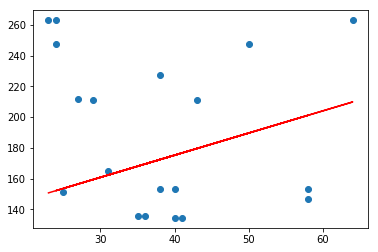

In [138]:
gradient_fun(sub_age,sub_fare)

### 总结
##### 综上3个方法：
方法一随机生成参数的方式拟合函数，收敛速度慢
方法二监督方向的方式拟合函数，收敛速度快，但无法解决复杂（维度高）问题
方法三梯度下降的方式拟合函数，收敛速度快，更加通用

##### deep learning 研究方面
1. func - > 拟合函数 --> 模型设计问题
2. init_para -> 参数初始化 --> 参数初始化问题
3. loss -> 性能评估 -->loss各种变化、优化问题
4. process -> 数据预处理 --> normalize、standaliaze、去异常点灯处理问题
5. optimization -> 优化器 --> 1. learning rate、step 2.优化策略，sgd，Adam等